## Librerías

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.cluster import hierarchy
import statistics
from sklearn.neighbors import KNeighborsClassifier
import math

# Data processing

### Load datasets

In [2]:
dfmovies = pandas.read_csv('datasets/movies_description.txt', sep='|', header=None)
dfusers = pandas.read_csv('datasets/users_description.txt', sep='|',header=None)
dfscores = pandas.read_csv('datasets/movies_users.txt', sep='\t',header=None)

### Datasets length

In [3]:
nusers = len(dfusers.values)
nmovies = len(dfmovies.values)
print('nusers', nusers)
print('nmovies', nmovies)

nusers 943
nmovies 1682


### Movies scores dataframe creation

In [4]:
evaluations = np.zeros((nmovies, nusers))
evaluations[ dfscores.values[:,1]-1, dfscores.values[:,0]-1 ] = dfscores.values[:,2]

dfevaluations = pandas.DataFrame(evaluations, index=dfmovies.values[:,1], columns=np.arange(nusers)+1)
dfevaluations.head()

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
Toy Story (1995),5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
GoldenEye (1995),3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Four Rooms (1995),4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Get Shorty (1995),3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Copycat (1995),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Statistical measures of the scores

In [5]:
# Average, Median, Standard deviation, Mode
noScoreMetrics = 2
scoresMetrics = []
moviesName = []
moviesGenre = []

for i in range(nmovies):
    individualScores = []
    for j in range(nusers):
        if(dfevaluations.values[i,j] > 0):
            individualScores.append(dfevaluations.values[i,j])
    if(len(individualScores) >= 50):
        moviesName.append(dfmovies.values[i, 1])
        moviesGenre.append(dfmovies.values[i, 5:]*10)
        # scoresMetrics.append([np.mean(individualScores)*10, np.median(individualScores)*10])
        scoresMetrics.append([np.mean(individualScores)*10, np.median(individualScores)*10, np.std(individualScores)*10, statistics.mode(individualScores)*10])


#### Movies count

In [6]:
print(len(moviesName))

603


#### Update amount of array data

In [7]:
nusers = len(dfusers.values)
nmovies = len(moviesName)

### Labels

In [8]:
titles = ['Average Score', 'Median Score', 'Std score', 'Mode score', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movieGenreName = ['Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

## Create base dataframe

In [9]:
# Creación del dataframe en ceros.
movies = np.zeros( (nmovies, len(titles)) )
movies = pandas.DataFrame(movies)

# Se añaden los datos de las métricas estadísticas.
movies.iloc[:, 0:4] = scoresMetrics

# Se añaden los datos de los géneros de la películas.
movies.iloc[:, 4:] = moviesGenre

# Se añaden las etiquetas.
movies.index = moviesName
movies.columns = titles

# Visualizar dataframe.
movies.head()

,Average Score,Median Score,Std score,Mode score,Unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Toy Story (1995),38.783186,40.0,9.268697,40.0,0,0,0,10,10,10,...,0,0,0,0,0,0,0,0,0,0
GoldenEye (1995),32.061069,30.0,9.628009,30.0,0,10,10,0,0,0,...,0,0,0,0,0,0,0,10,0,0
Four Rooms (1995),30.333333,30.0,12.060035,30.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
Get Shorty (1995),35.502392,40.0,9.627574,40.0,0,10,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
Copycat (1995),33.023256,30.0,9.409269,40.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0


## Movies scores dataframe creation

### Perform hierarchical/agglomerative clustering

In [10]:
Z = hierarchy.linkage(movies.values, 'ward')

### View dendrogram (just to get an idea of the distances)

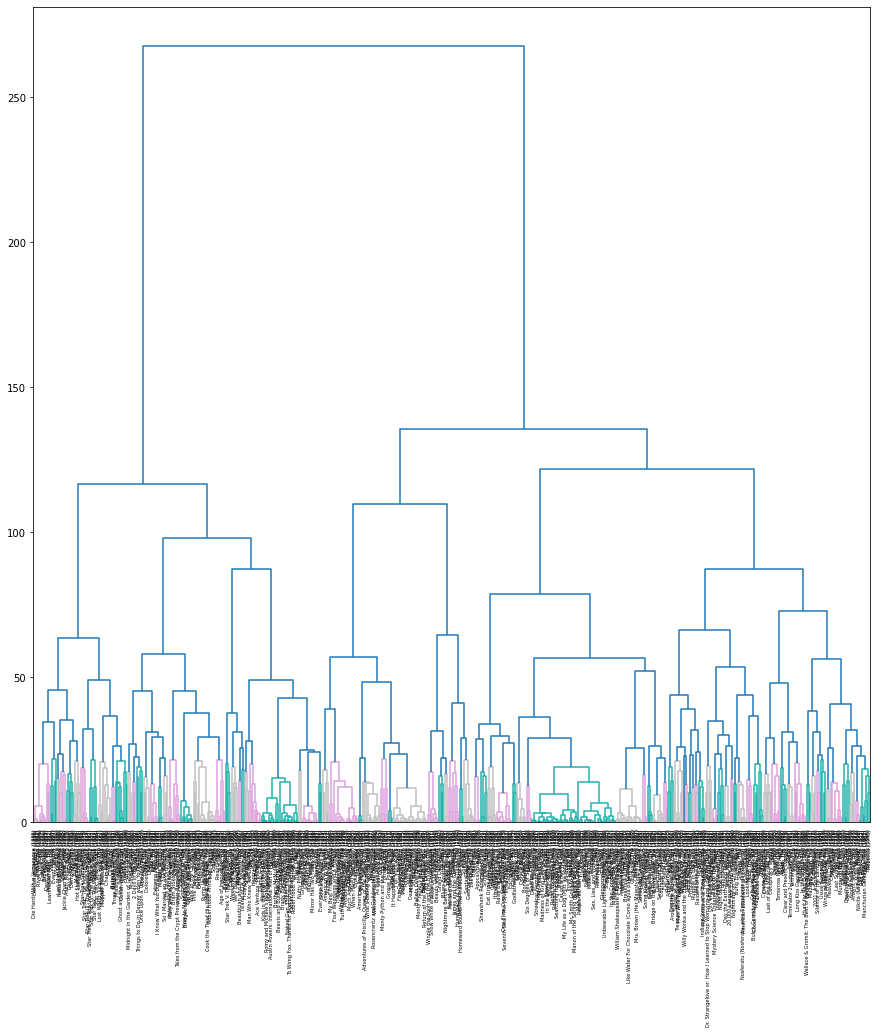

In [11]:
# Colores
hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])

# Graficar dendograma
plt.figure(figsize=(15,15))
dn = hierarchy.dendrogram(Z, labels=moviesName, color_threshold=22)
plt.show()

# Main code

### Nearest neighbor class

In [12]:
class NearestNeighbor:
    def __init__(self, k=5):
        self.k = k
        self.Xtrain = None
        self.Ytrain = None

    def fit(self,Xtrain,Ytrain):
        self.Xtrain = Xtrain
        self.Ytrain = Ytrain
        
    def predict(self, X):
    # 1. Calcular la distancia de los datos X a los datos Xtrain. Matriz nxm
        # Obtener tamaño de las X.
        n = len(self.Xtrain)
        m = len(X)
        
        # Crear matriz de distancias. 
        zeroMatrix = np.zeros([n, m])
        
        # Calcular las distancias.
        distanceMatrix = self.calculateEuclideanDistance(zeroMatrix, X)
        
        # Crear vectores de predicción de las Y y la clasificación de las Y de los k vecinos más cercanos.
        Ypred = np.zeros(m)
        Y_KN = []
        
        # Iterar para cada conjunto de X
        for i in range(m):
            # 2. Ordenar las distancias de menor a mayor.
            distanceMatrix = distanceMatrix.sort_values(by=[i], ascending=True)
        
            # Obtener los índices de las filas.
            data_top = distanceMatrix.head(n=self.k) 
            index_top = list(data_top.index.values)
            # print(index_top)
            
            # Obtener la clasificación de los k vecinos más cercanos.
            Y_KN = self.Ytrain[index_top]
                
            # Obtener la clasificación del vecino más cercano.
            Ypred[i] = Y_KN[0]
            
    # 4-. Regresar valor.
        return int(Ypred[i])

    def calculateEuclideanDistance(self, distanceMatrix, X):
        # Obtener dimensiones de la matriz de distancias.
        n, m = distanceMatrix.shape
        
        for i in range(n):
            for j in range(m):
                distanceMatrix[i,j] = math.sqrt( np.sum( np.power(X[j]-self.Xtrain[i],2) ) )
        
        distanceMatrix = pandas.DataFrame(distanceMatrix)
        return distanceMatrix

### Get cluster by movie

In [13]:
def getCluster(choseMovie, thresholdToAvoid):
    # Lista de índices de 0 a nmovies.
    idxs = range(0,nmovies,1)
    
    # Lista a np.array.
    idxs = np.asarray(idxs)
    
    # Variables a utilizar
    thresholdIncrement = 0.01
    threshold = 0.01
    prevGroup = 0

    # Mientras no se llegue al tope de distancia.
    while threshold < 260: 
        # Formar grupos planos a partir del agrupamiento jerárquico definido por la matriz de vinculación dada.
        g = hierarchy.fcluster(Z,criterion='distance',t=threshold)
        
        # Obtener grupos únicos.
        groups = np.unique(g)

        # Ir de grupo en grupo.
        for group in groups:
            # Si la película escogida está en el grupo; si el tamaño del grupo es mayor a 1; y si el grupo
            # en revisión (actual) es diferente al grupo previamente revisado.
            if choseMovie in idxs[g==group] and len(idxs[g==group]) > 1 and group != prevGroup:
                # Si el límite de distancia es mayor al límite de distancia a evitar. 
                if threshold > thresholdToAvoid:
                    # Regresar los índices del grupo y el límite de distancia actual.
                    return [idxs[g==group], threshold]
                
                prevGroup = group
                break
            else:
                # Incremento al límite de distancia.
                threshold = threshold + thresholdIncrement

### Get movie recommendation 

In [29]:
def getMovieRecommendation(choseMovie, moviesToIgnore, recommendedMovies):
    # Lista de nombres de películas a np.array. 
    moviesNameNP = np.asarray(moviesName)

    # Variables a usar.
    validCluster = False
    threshold = 0.0
    
    # Arrays y matrices a usar.
    cluster = []
    X_choseMovie = None
    X_cluster = []
    Y_cluster = []
    
    # Verificar si el cluster es válido.
    while validCluster == False:
        # Obtener cluster.
        cluster, threshold = getCluster(choseMovie,threshold)
        
        # Borrar índices de películas que no deben estar.
        clusterIdxToDelete = []
        for i in range( len(cluster) ):
            if cluster[i] in moviesToIgnore:
                clusterIdxToDelete.append(i)
        cluster = np.delete(cluster, clusterIdxToDelete)

        # Si el tamaño del cluster es mayor a 0.
        if len(cluster) > 0:
            validCluster = True

    # Valores de 'X' de la película elegida.
    X_choseMovie = movies.values[choseMovie]

    # Valores de 'X' y de 'Y' de las películas dentro del cluster.
    for movie_idx in cluster:
        X_cluster.append( movies.values[movie_idx] )
        Y_cluster.append(movie_idx)
        
    # print(moviesNameNP[cluster])

    # Lista a np.array.
    X_cluster = np.asarray(X_cluster)
    Y_cluster = np.asarray(Y_cluster)

    # Obtener la película más cercana.
    NearestNeighborModel = NearestNeighbor()
    NearestNeighborModel.fit(X_cluster,Y_cluster)
    Ypred = NearestNeighborModel.predict(X_choseMovie)

    # Se añaden a los arreglos.
    moviesToIgnore.append(Ypred)
    recommendedMovies.append(Ypred)
    
    # Sólo 5 elementos.
    recommendedMovies = recommendedMovies[:5]
    
    return [recommendedMovies, moviesToIgnore]
    
    

# User input

## See all movies

In [15]:
# Array de nombres de películas a Dataframe
moviesNameDF = pandas.DataFrame(moviesName)
pandas.set_option('display.max_rows', None)

# Añadir etiqueta.
moviesNameDF.columns = ['Películas']

moviesNameDF

,Películas
0,Toy Story (1995)
1,GoldenEye (1995)
2,Four Rooms (1995)
3,Get Shorty (1995)
4,Copycat (1995)
5,Twelve Monkeys (1995)
6,Babe (1995)
7,Dead Man Walking (1995)
8,Richard III (1995)
9,Seven (Se7en) (1995)


### Array of movie names

In [16]:
# Lista de nombres de películas a np.array. 
moviesNameNPA = np.asarray(moviesName)

### Input part

In [32]:
# Arreglo donde irán las películas elegidas.
chosenMovies = []

# Input de las películas.
while True:
    chosenMovies = list(map(int, input("Elegir 5 películas (poner su ID separados por espacio): ").strip().split()))
    
    if( len(np.unique(chosenMovies)) == 5 and len(chosenMovies) == 5 ):
        break
    else:
        print("No se deben repetir películas y la cantidad deben ser 5.")

# Películas a recomendar.
recommendedMovies = []

# Películas a ignorar.
moviesToIgnore = chosenMovies.copy()

# Recortar lista a sólo 5 elecciones.
chosenMovies = chosenMovies[:5]

# Imprimir el nombre de las películas elegidas.
print(moviesNameNPA[chosenMovies])

Elegir 5 películas (poner su ID separados por espacio): 38 0 193 199 154
['Star Wars (1977)' 'Toy Story (1995)' 'Star Trek: First Contact (1996)'
 'Star Trek III: The Search for Spock (1984)' 'Alien (1979)']


### Get movie recommendation

In [33]:
# Obtener recomendaciones.
for choseMovie in chosenMovies:
    recommendedMovies, moviesToIgnore = getMovieRecommendation(choseMovie, moviesToIgnore, recommendedMovies)
    
# Imprimir recomendaciones.
print('Te recomendamos ver: ', '\n')
for i in recommendedMovies:
    print(moviesNameNPA[i])

Te recomendamos ver:  

Empire Strikes Back, The (1980)
Aladdin (1992)
Jurassic Park (1993)
Star Trek: The Motion Picture (1979)
Face/Off (1997)
